# Data Loading and Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

df = pd.read_csv('mv.csv')
#DATA CLEANING 
df.columns = df.columns.str.strip()  
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Revenue (Millions)'] = pd.to_numeric(df['Revenue (Millions)'], errors='coerce')
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')
df['Runtime (Minutes)'] = pd.to_numeric(df['Runtime (Minutes)'], errors='coerce')
df.dropna(subset=['Year', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore', 'Runtime (Minutes)'], inplace=True)

In [3]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


# Plot distributions of variables

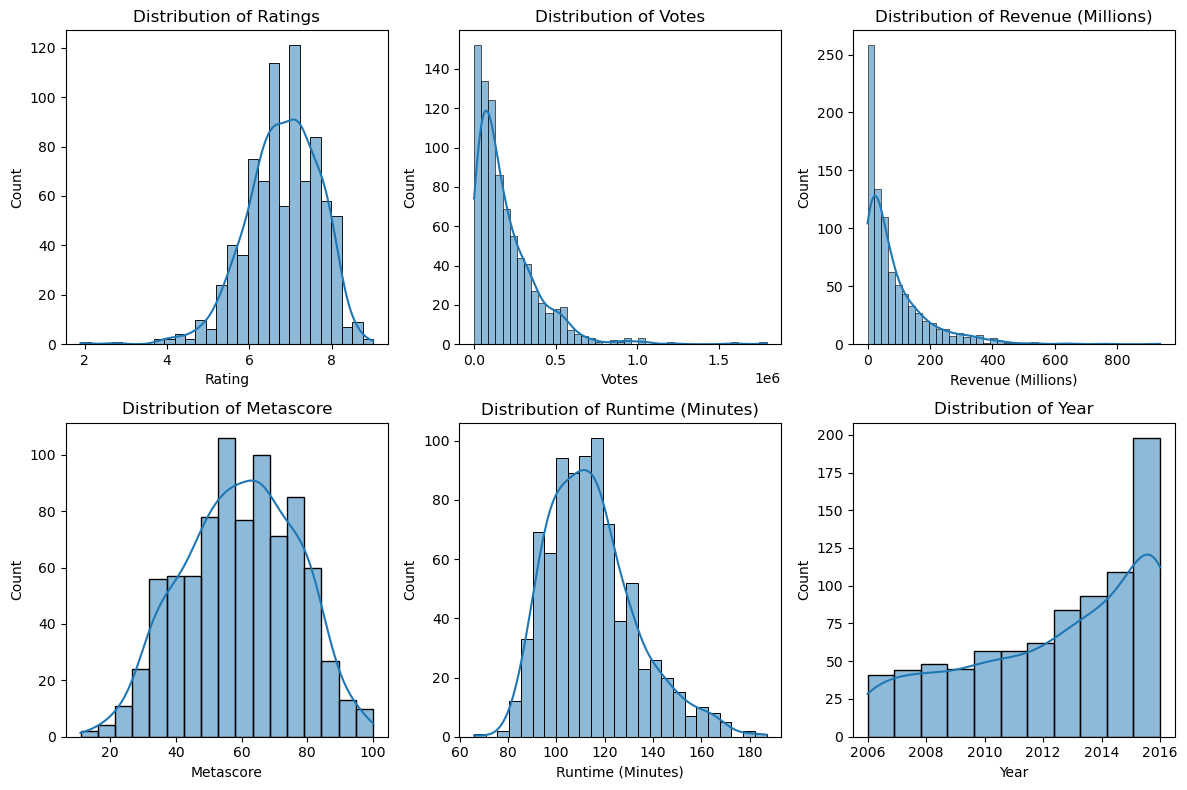

In [4]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of Ratings')

plt.subplot(2, 3, 2)
sns.histplot(df['Votes'], kde=True)
plt.title('Distribution of Votes')

plt.subplot(2, 3, 3)
sns.histplot(df['Revenue (Millions)'], kde=True)
plt.title('Distribution of Revenue (Millions)')

plt.subplot(2, 3, 4)
sns.histplot(df['Metascore'], kde=True)
plt.title('Distribution of Metascore')

plt.subplot(2, 3, 5)
sns.histplot(df['Runtime (Minutes)'], kde=True)
plt.title('Distribution of Runtime (Minutes)')

plt.subplot(2, 3, 6)
sns.histplot(df['Year'], kde=True)
plt.title('Distribution of Year')

plt.tight_layout()
plt.show()

# Outliers (using Z- score)

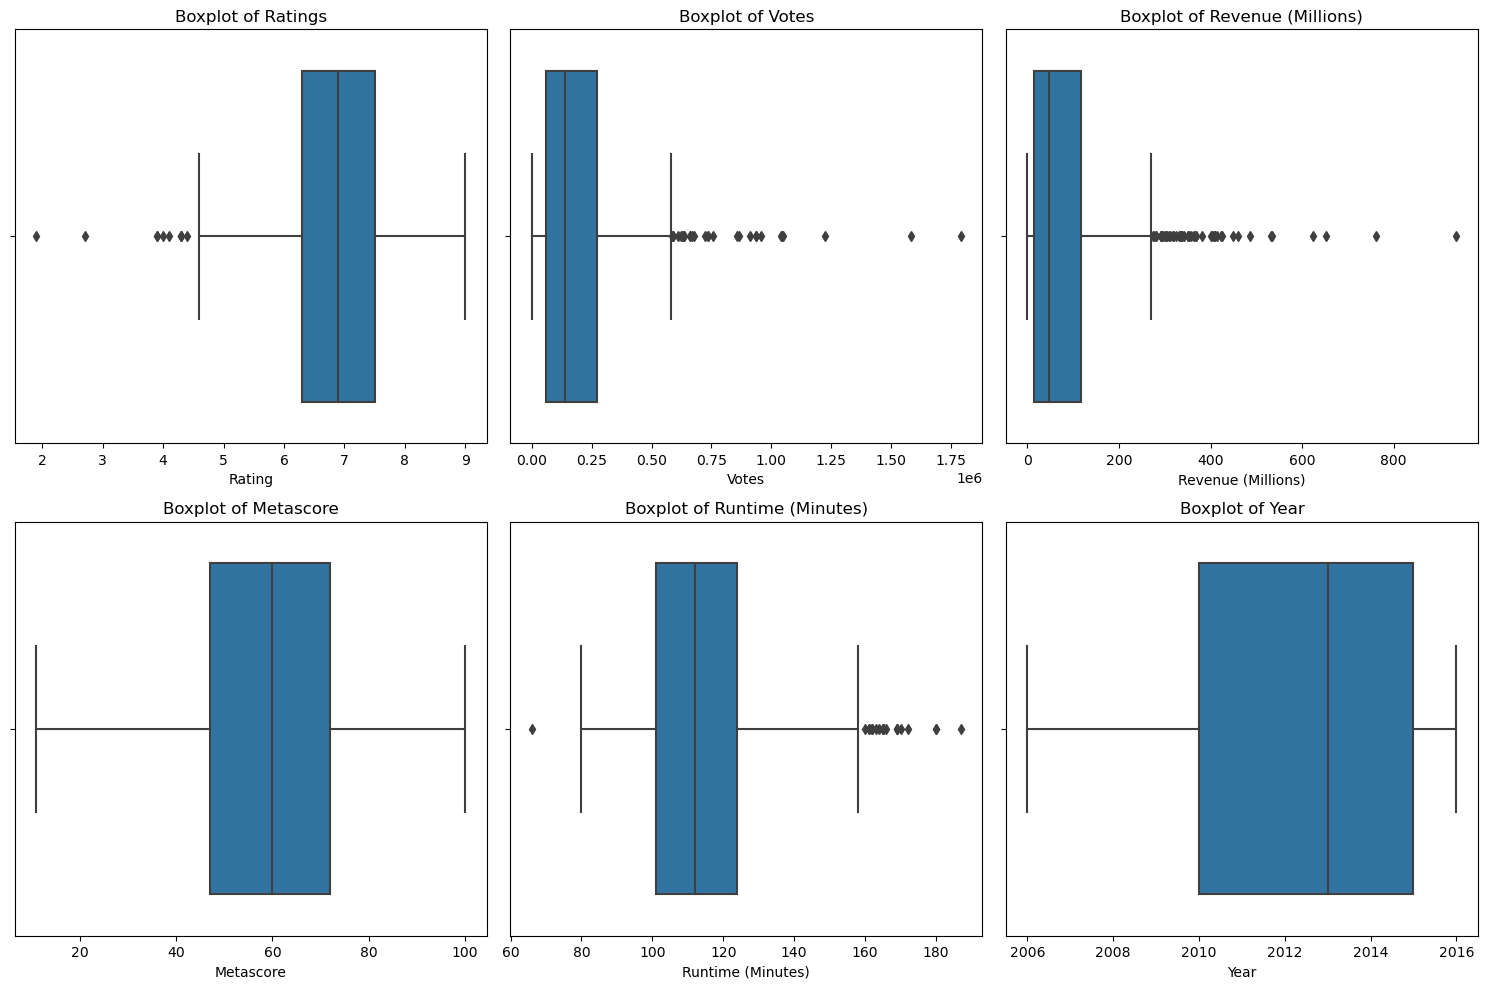

In [5]:
df_outliers = df[(zscore(df[['Rating', 'Votes', 'Revenue (Millions)', 'Metascore', 'Runtime (Minutes)']]) > 3).any(axis=1)]

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Ratings')

plt.subplot(2, 3, 2)
sns.boxplot(x=df['Votes'])
plt.title('Boxplot of Votes')

plt.subplot(2, 3, 3)
sns.boxplot(x=df['Revenue (Millions)'])
plt.title('Boxplot of Revenue (Millions)')

plt.subplot(2, 3, 4)
sns.boxplot(x=df['Metascore'])
plt.title('Boxplot of Metascore')

plt.subplot(2, 3, 5)
sns.boxplot(x=df['Runtime (Minutes)'])
plt.title('Boxplot of Runtime (Minutes)')

plt.subplot(2, 3, 6)
sns.boxplot(x=df['Year'])
plt.title('Boxplot of Year')

plt.tight_layout()
plt.show()


# correlations between variables

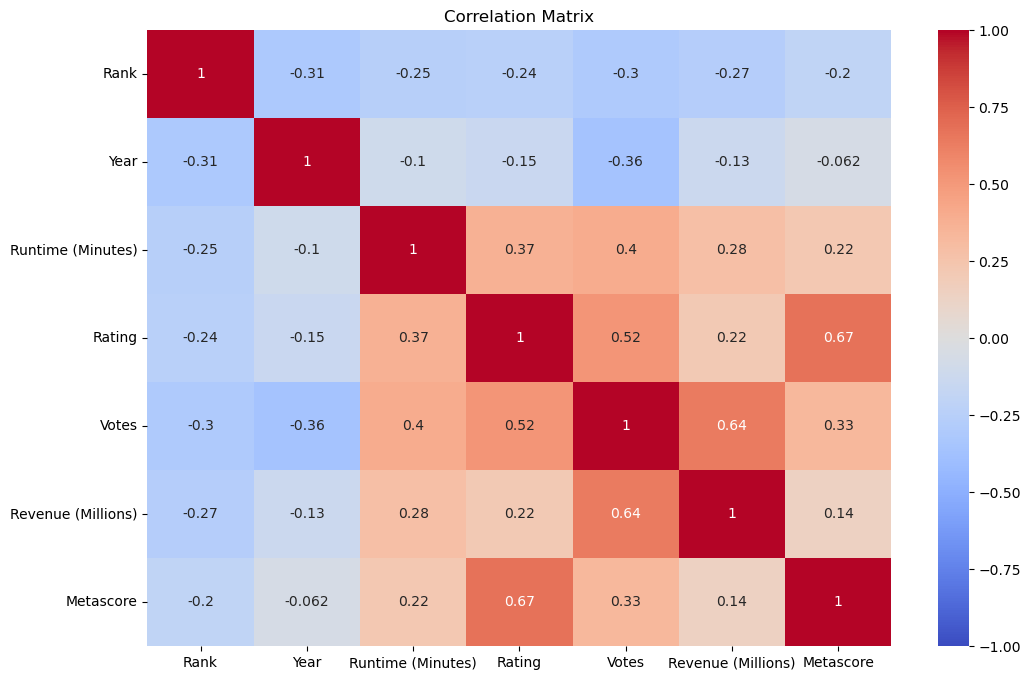

In [8]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Pairplot for detailed pairwise relationships

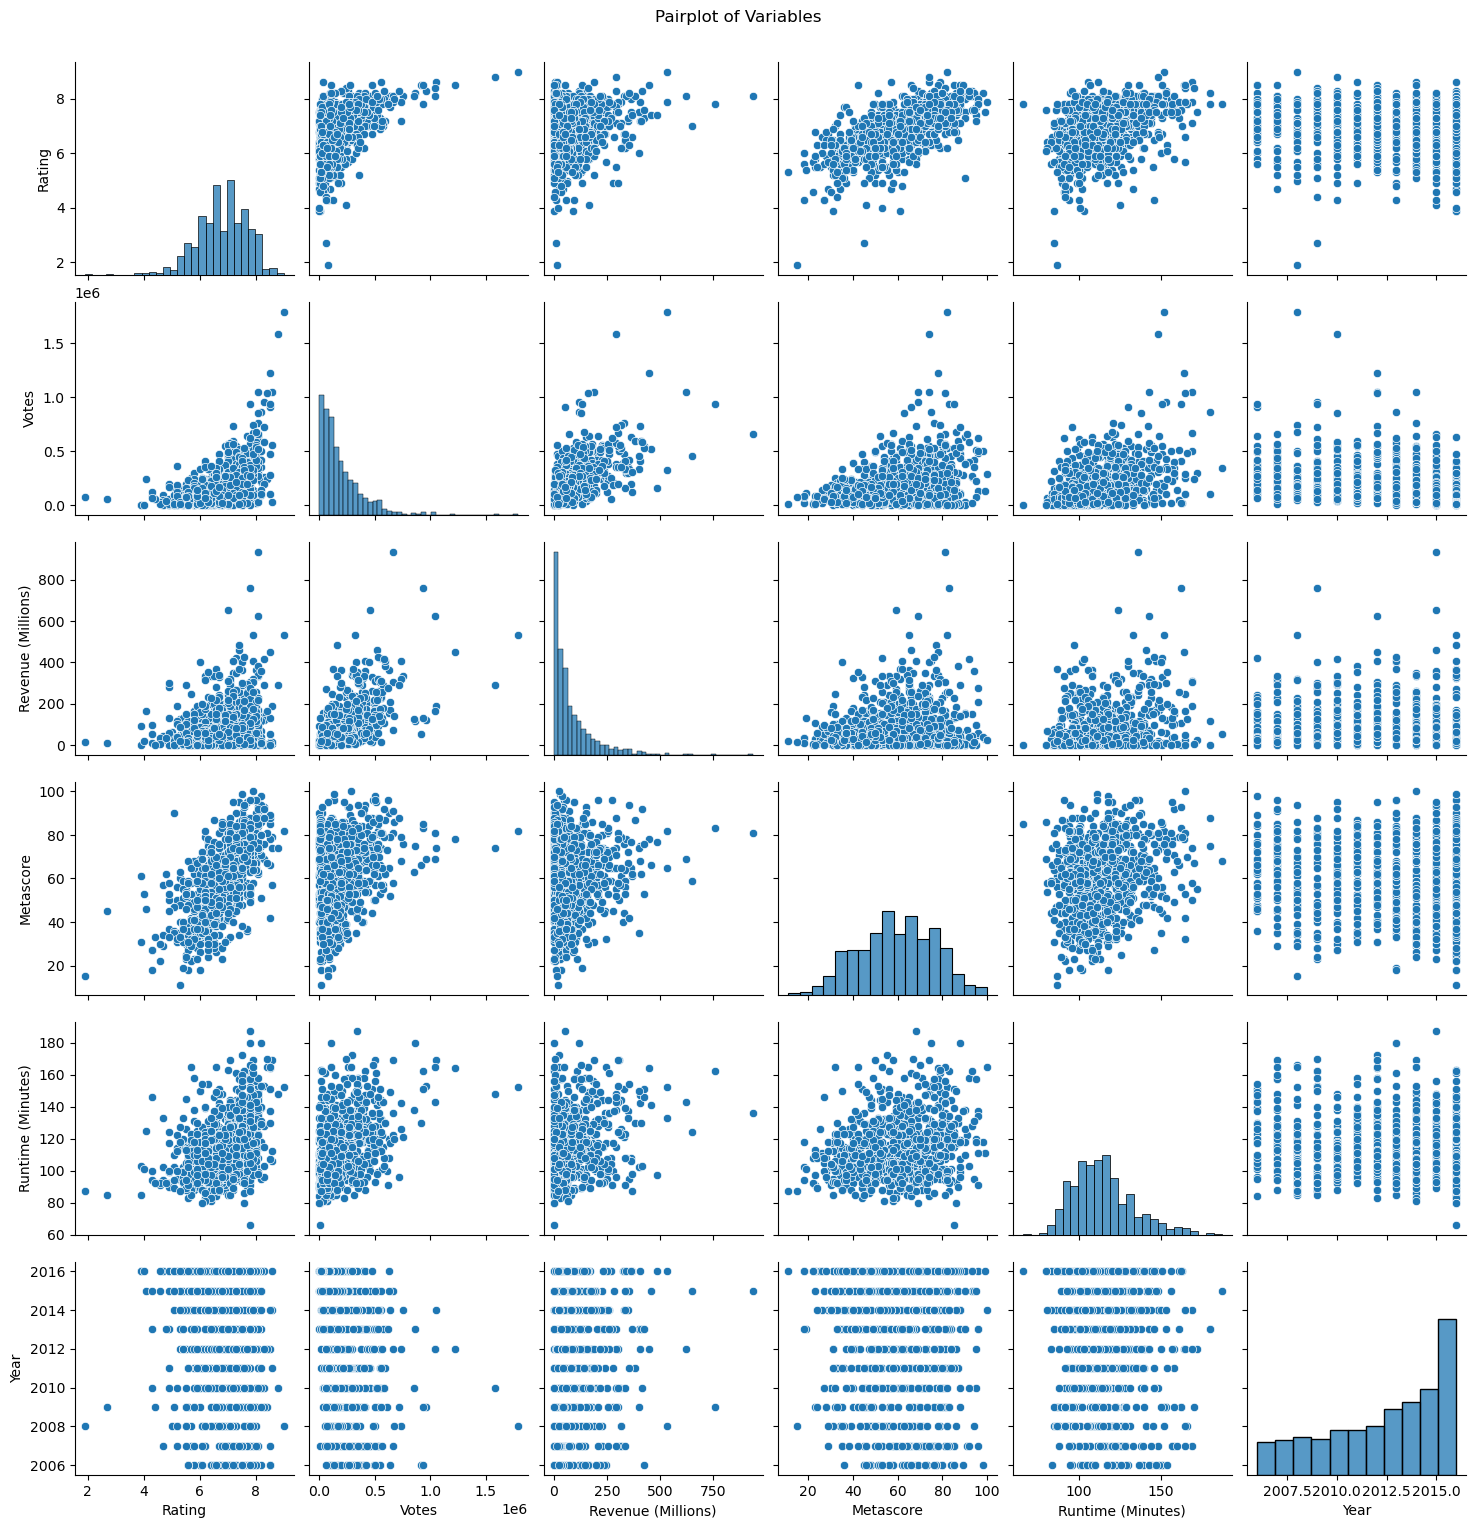

In [7]:
sns.pairplot(df[['Rating', 'Votes', 'Revenue (Millions)', 'Metascore', 'Runtime (Minutes)', 'Year']])
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()